---------------------------------

## Nivel1. Ejercicio1

Realiza un pipeline y gridsearch de un RandomForest con dataset a elegir.

----------------------------

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

Elegimos como dataset el de la calidad del vino de kaggle incluido en:

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
data_path_file='winequality-red.csv'
df =pd.read_csv(data_path_file, sep=';')

In [3]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
111,8.4,0.620,0.09,2.2,0.084,11.0,108.0,0.99640,3.15,0.66,9.8,5
974,8.8,0.330,0.41,5.9,0.073,7.0,13.0,0.99658,3.30,0.62,12.1,7
1552,6.3,0.680,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3,6
1041,6.9,0.490,0.19,1.7,0.079,13.0,26.0,0.99547,3.38,0.64,9.8,6
647,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0,4


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Un Pipeline consiste en una lista de transforms y un estimator final. Todos ellos se aplican de manera secuencial.

Los transforms implementan metodos fit y transform. El estimator solo implementa fit. 

In [8]:
y = df['quality']
X = df.drop(columns='quality')

In [9]:
X.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1112,7.9,0.33,0.41,1.5,0.056,6.0,35.0,0.99396,3.29,0.71,11.0
689,8.1,0.38,0.48,1.8,0.157,5.0,17.0,0.99760,3.30,1.05,9.4
1249,7.1,0.60,0.01,2.3,0.079,24.0,37.0,0.99514,3.40,0.61,10.9
1105,6.3,0.57,0.28,2.1,0.048,13.0,49.0,0.99374,3.41,0.60,12.8
26,7.6,0.41,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.5


In [10]:
y.sample(5)

498     8
1137    6
1440    7
1434    6
1176    4
Name: quality, dtype: int64

In [11]:
steps = [('scaler', StandardScaler()), ('Forest', RandomForestRegressor())]

In [12]:
# define the pipeline object.

pipe = Pipeline(steps) 

In [13]:
parameters = {'Forest__n_estimators':[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80],
              'Forest__criterion':['squared_error'] }

In [14]:
grid = GridSearchCV(pipe, param_grid= parameters, cv=5, n_jobs=4, verbose=4)                                 

In [15]:
grid_result = grid.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [16]:
grid_result.cv_results_

{'mean_fit_time': array([0.02809691, 0.05462446, 0.08095336, 0.10813756, 0.11782489,
        0.16336236, 0.18269444, 0.23765283, 0.2483942 , 0.27476525,
        0.27378836, 0.28533888, 0.31786747, 0.38107467, 0.42066698,
        0.60529399]),
 'std_fit_time': array([0.00327037, 0.00146673, 0.00455859, 0.00466211, 0.00397158,
        0.00402552, 0.00572186, 0.0116231 , 0.02277839, 0.02093184,
        0.00558097, 0.00282534, 0.02442116, 0.01478121, 0.02511436,
        0.0621073 ]),
 'mean_score_time': array([0.00201569, 0.00399747, 0.00399776, 0.00359826, 0.00406485,
        0.0059968 , 0.00460839, 0.0063025 , 0.00821595, 0.005654  ,
        0.00684023, 0.0060204 , 0.01003332, 0.00803342, 0.01141567,
        0.01531811]),
 'std_score_time': array([0.00311682, 0.00154828, 0.00089426, 0.00048992, 0.00411948,
        0.00167232, 0.00265796, 0.00040261, 0.00162193, 0.00233892,
        0.00176342, 0.00420691, 0.00507383, 0.00311103, 0.00216978,
        0.00098609]),
 'param_Forest__criterion'

In [17]:
grid_result.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('Forest', RandomForestRegressor(n_estimators=65))])

In [18]:
grid_result.best_score_

0.3205783852968629

In [19]:
parameters['Forest__n_estimators']

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

In [20]:
grid_result.cv_results_['mean_test_score']

array([0.17246062, 0.25459384, 0.27431512, 0.28242133, 0.29318676,
       0.29101998, 0.28894921, 0.29799822, 0.31100414, 0.29316663,
       0.303174  , 0.30977697, 0.32057839, 0.30904252, 0.31748794,
       0.31309245])

<AxesSubplot:>

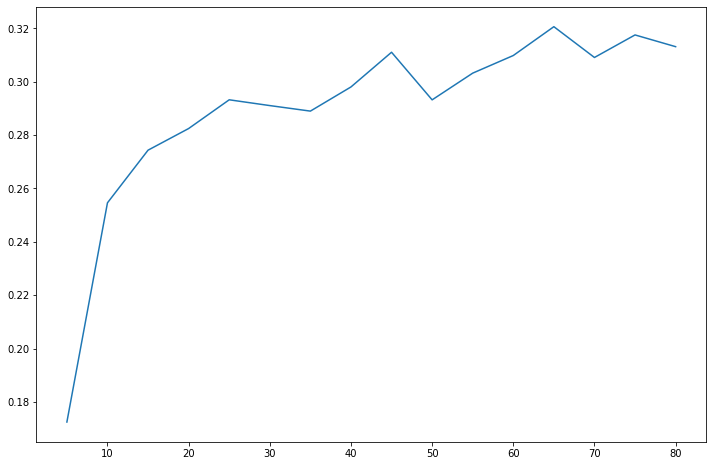

In [21]:
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.lineplot(x=parameters['Forest__n_estimators'], y=grid_result.cv_results_['mean_test_score'])

Elegimos n_estimators=65

In [29]:
parameters2 = {'Forest__n_estimators':[65], 'Forest__criterion':['squared_error'], 
               'Forest__max_depth':[4,5,6,7,8,9,10,11,12] }

In [30]:
grid2 = GridSearchCV(pipe, param_grid=parameters2, cv=5, n_jobs=4, verbose=4)

In [31]:
grid_result2 = grid2.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [32]:
grid_result2.cv_results_

{'mean_fit_time': array([0.16070528, 0.19583097, 0.19867921, 0.25875587, 0.25574284,
        0.2712286 , 0.32556801, 0.32893972, 0.31533031]),
 'std_fit_time': array([0.02520039, 0.01792316, 0.01682749, 0.04492068, 0.01009742,
        0.02043931, 0.02855626, 0.01533424, 0.0286915 ]),
 'mean_score_time': array([0.00513086, 0.00562606, 0.00401177, 0.00802975, 0.00823731,
        0.00940299, 0.0084022 , 0.00699625, 0.00820537]),
 'std_score_time': array([0.0065283 , 0.00409699, 0.0042061 , 0.01038366, 0.00363723,
        0.0059142 , 0.00102993, 0.0035758 , 0.00099017]),
 'param_Forest__criterion': masked_array(data=['squared_error', 'squared_error', 'squared_error',
                    'squared_error', 'squared_error', 'squared_error',
                    'squared_error', 'squared_error', 'squared_error'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_Forest__max_depth': m

In [33]:
grid_result2.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('Forest',
                 RandomForestRegressor(max_depth=8, n_estimators=65))])

In [34]:
grid_result2.best_score_

0.32352431809112336

<AxesSubplot:>

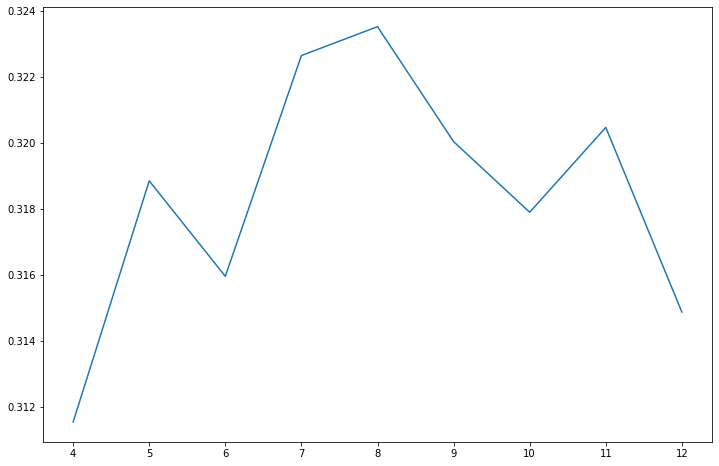

In [35]:
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.lineplot(x= parameters2['Forest__max_depth'], y= grid_result2.cv_results_['mean_test_score'])

Elegimos max_depth=8 como mejor valor para el parametro.